In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [141]:
bosMara14_df = pd.read_csv('bostonmarathon2014.csv').dropna()
bosMara14_df = bosMara14_df.reset_index(drop=True)
bosMara14_df = bosMara14_df.drop([138, 260, 265, 739, 930])
bosMara14_df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,18.78,"Kim, Gyu Dae",15,50.33,M,30,89.52,W14,15,KOR,...,15,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75
1,19.37,"Gordian, Aaron",17,54.20,M,49,95.28,W17,17,MEX,...,18,3.65,AZ,66.62,8.93,44.82,42.47,USA,Phoenix,90.07
2,21.47,"Pulido, Jose Sr.",28,58.30,M,33,104.08,W27,28,MEX,...,34,3.98,GA,72.97,10.08,48.77,46.33,USA,Clarkesville,98.48
3,30.82,"Jami, Segundo O. Sr.",24,78.88,M,27,140.87,45,26,ECU,...,30,5.38,CO,95.97,15.23,66.28,62.78,USA,Boulder,132.67
4,32.53,"Sanca, Ruben",21,81.02,M,27,139.08,50,21,CPV,...,22,5.32,MA,97.65,16.23,68.42,64.95,USA,Lowell,131.40


In [145]:
X = bosMara14_df.drop(['gender', 'name', 'city', 'country', 'state', 'ctz', 'bib'], 1)
y = bosMara14_df['gender']
 # 0 = male and 1 = female
y = np.where(y == 'M', 0, 1)

In [161]:
n = np.sort(X['age'].unique())
X[X['age'] == 19]

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
86,38.90,757,97.57,19,170.45,938,139.77,990,6.52,118.17,19.60,82.30,78.07,161.17


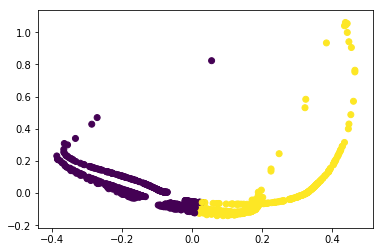

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      205  358
1      394    0


In [146]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(n_components=0.95).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))


## Data contains mostly times people finished each mile stone which is not good indicator of gender